In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


## 활성화 함수의 종류 (1) 이진 계단 함수

In [2]:
def binary_step(x, threshold=0):
    return 1 if x >= threshold else 0

In [7]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해주세요
    return 0 if x<threshold else 1

In [8]:
binary_step(-1)

0

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

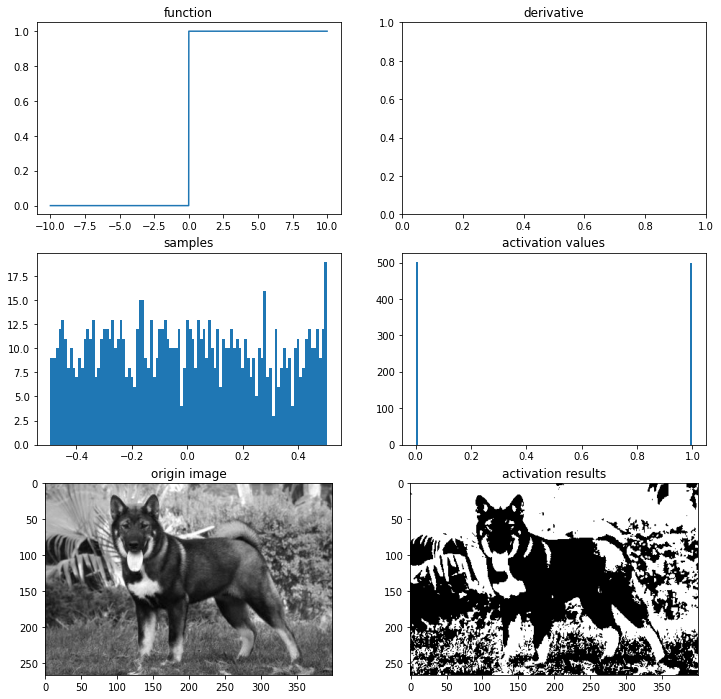

In [10]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

------------------
------------------
------------------
------------------


In [11]:
X = [-10 + x/100 for x in range(2000)]

In [13]:
X[-4:]

[9.96, 9.969999999999999, 9.98, 9.989999999999998]

In [14]:
samples = np.random.rand(1000)

In [16]:
len(samples)

1000

In [17]:
np.mean(samples)

0.49694039761607

(array([39., 37., 33., 39., 38., 30., 34., 34., 32., 35., 41., 26., 24.,
        18., 32., 34., 34., 32., 33., 37., 31., 29., 39., 33., 35., 28.,
        43., 35., 29., 36.]),
 array([0.00159788, 0.03481682, 0.06803577, 0.10125471, 0.13447365,
        0.1676926 , 0.20091154, 0.23413048, 0.26734943, 0.30056837,
        0.33378731, 0.36700626, 0.4002252 , 0.43344414, 0.46666309,
        0.49988203, 0.53310097, 0.56631991, 0.59953886, 0.6327578 ,
        0.66597674, 0.69919569, 0.73241463, 0.76563357, 0.79885252,
        0.83207146, 0.8652904 , 0.89850935, 0.93172829, 0.96494723,
        0.99816618]),
 <BarContainer object of 30 artists>)

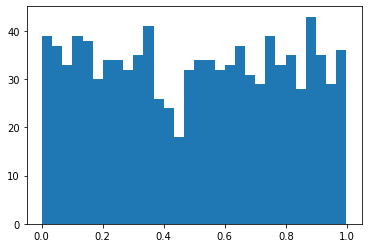

In [23]:
plt.hist(samples, 30)

In [26]:
image = Image.open(img_path)

In [28]:
type(image)

PIL.JpegImagePlugin.JpegImageFile

In [30]:
image = np.array(image)/255.0

(array([ 1316.,  1636.,  3861.,  6621.,  8982., 10321., 11517., 12531.,
        13369., 12942., 15350., 12499., 11672., 10918., 10281.,  9562.,
         9405.,  8758.,  8293.,  8016.,  9166.,  7191.,  7011.,  7004.,
         6970.,  6940.,  6826.,  6348.,  6229.,  5983.,  7246.,  5669.,
         5892.,  5585.,  5727.,  5648.,  5277.,  4730.,  3847.,  2694.,
         2415.,  1574.,  1272.,  1056.,   866.,   744.,   656.,   565.,
          495.,   924.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

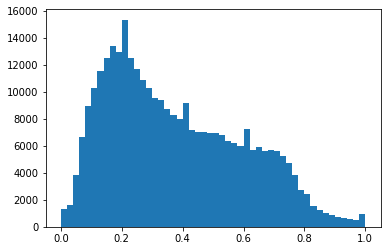

In [35]:
plt.hist(image.ravel(), 50)

(array([ 1316.,  1636.,  3861.,  6621.,  8982., 10321., 11517., 12531.,
        13369., 12942., 15350., 12499., 11672., 10918., 10281.,  9562.,
         9405.,  8758.,  8293.,  8016.,  9166.,  7191.,  7011.,  7004.,
         6970.,  6940.,  6826.,  6348.,  6229.,  5983.,  7246.,  5669.,
         5892.,  5585.,  5727.,  5648.,  5277.,  4730.,  3847.,  2694.,
         2415.,  1574.,  1272.,  1056.,   866.,   744.,   656.,   565.,
          495.,   924.]),
 array([-0.33333333, -0.31333333, -0.29333333, -0.27333333, -0.25333333,
        -0.23333333, -0.21333333, -0.19333333, -0.17333333, -0.15333333,
        -0.13333333, -0.11333333, -0.09333333, -0.07333333, -0.05333333,
        -0.03333333, -0.01333333,  0.00666667,  0.02666667,  0.04666667,
         0.06666667,  0.08666667,  0.10666667,  0.12666667,  0.14666667,
         0.16666667,  0.18666667,  0.20666667,  0.22666667,  0.24666667,
         0.26666667,  0.28666667,  0.30666667,  0.32666667,  0.34666667,
         0.36666667,  0.3866666

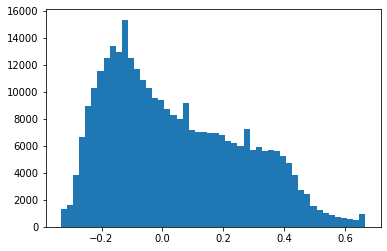

In [36]:
plt.hist(image.ravel() - np.median(image), 50)

In [31]:
np.median(image)

0.3333333333333333

------------------
------------------
------------------
------------------


In [ ]:
 X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')

#### 이러한 퍼셉트론은 선형적으로 구분 가능한(linearly seperable), 즉 하나의 선으로 구분 가능한 문제를 구현 가능.

In [37]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [38]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

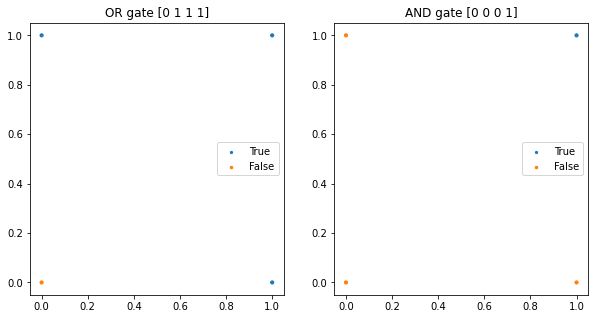

In [51]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

### OR_gate, AND_gate 훈련해보기

- X와 or_y, and_y를 라벨값으로 주면서 훈련 시킴

In [54]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([1.68981167, 1.11958332]), array([-1.10631188]))
999th epoch, accuracy : 1.0
(array([0.28030131, 0.0148958 ]), array([-0.28606215]))


- Accuracy 1.0으로서 잘 구분하는 듯
- 그래프로 확인해보기
- x축, y축을 100등분할 예정
- 이를 통해 구분선을 확인하고 선 하나로 단층 퍼셉트론이 진짜 문제를 푸는지 확인

------------------
------------------
------------------
------------------


- test_X 는 이변수 매트릭스가 되는 것이고,
- or_p는 그 이변수를 받아서 내적 후 값을 낸다. 그리고 그 값은 binary_step을 거쳐서 1 또는 0 중에 라벨링되어서 나온다.
- 아래의 그래프는 해당 값들의 좌표 평면 내 분포이다.(이변수이니 2차원 평면)

In [68]:
test_X.shape

(10201, 2)

In [64]:
or_p(test_X)

array([0, 0, 0, ..., 1, 1, 1])

In [66]:
np.unique(or_p(test_X), return_counts=True)

(array([0, 1]), array([3317, 6884]))

------------------
------------------
------------------
------------------


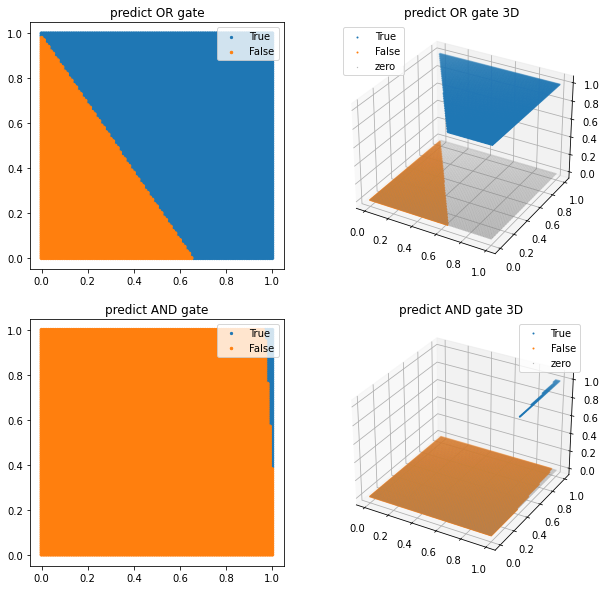

In [55]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

- 그런데 모양이 좀 이상하다.
- 이 모양은 train 때마다 다르겠지만, 생각해보면 0, 1만 나누는 것이므로 저렇게 나오게 된다.

--------------------
--------------------
--------------------
--------------------

In [52]:
or_y

array([0, 1, 1, 1])

In [53]:
and_y

array([0, 0, 0, 1])

In [39]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [44]:
np.ma.masked_where(a == 2, a)

masked_array(data=[0, 1, --, 3],
             mask=[False, False,  True, False],
       fill_value=999999)

In [43]:
b = np.array([5,6,7,8])

In [45]:
np.ma.masked_where(a == 2, b)

masked_array(data=[5, 6, --, 8],
             mask=[False, False,  True, False],
       fill_value=999999)

In [47]:
np.ma.masked_where(a == 2, b).mask

array([False, False,  True, False])

In [49]:
np.ma.masked_where(a == 2, b).data

array([5, 6, 7, 8])

In [50]:
np.ma.masked_where(a == 2, b).fill_value

999999

In [62]:
for x in product(range(10)):
    print(x)

(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)


In [61]:
for x in product(range(10), range(10, 20)):
    print(x)

(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 14)
(0, 15)
(0, 16)
(0, 17)
(0, 18)
(0, 19)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(2, 10)
(2, 11)
(2, 12)
(2, 13)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(3, 10)
(3, 11)
(3, 12)
(3, 13)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(4, 10)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(6, 10)
(6, 11)
(6, 12)
(6, 13)
(6, 14)
(6, 15)
(6, 16)
(6, 17)
(6, 18)
(6, 19)
(7, 10)
(7, 11)
(7, 12)
(7, 13)
(7, 14)
(7, 15)
(7, 16)
(7, 17)
(7, 18)
(7, 19)
(8, 10)
(8, 11)
(8, 12)
(8, 13)
(8, 14)
(8, 15)
(8, 16)
(8, 17)
(8, 18)
(8, 19)
(9, 10)
(9, 11)
(9, 12)
(9, 13)
(9, 14)
(9, 15)
(9, 16)
(9, 17)
(9, 18)
(9, 19)


--------------------
--------------------
--------------------
--------------------

### 이진 계단 함수의 한계 1
- XOR gate도 구현 가능할까?

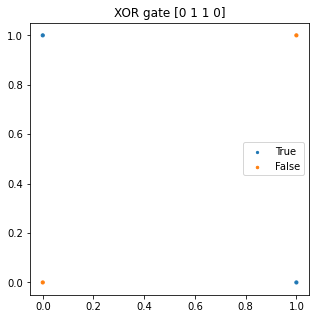

In [69]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

In [70]:
xor_y

array([0, 1, 1, 0])

999th epoch, accuracy : 0.25
(array([-0.02393517, -0.02284782]), array([0.0190384]))


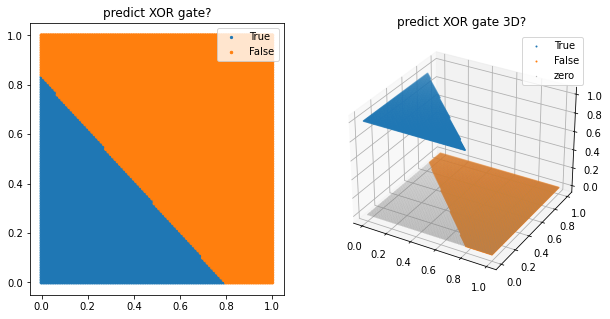

In [72]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

- 단층 퍼셉트론은 하나의 선으로만 문제를 해결하려 하기에 저렇게 생긴 데이터 분포는 해결하지 못함
- 그래서 multi-layer perceptron이 나오게 됨
  - 여기서 multi-layer는 신경망의 layer보다는 다수의 퍼셉트론이라는 뜻

In [73]:
test_X.shape

(10201, 2)

In [75]:
pred_xor_y.shape

(10201,)

### 이진 계단 함수의 한계 2

- 미분값이 어디든 다 0임
- 그래서 backpropagation 불가

## 활성화 함수의 종류 (2) 선형 활성화 함수

- 미분 가능(역전파 알고리즘 사용해서 업데이트 가능)
- 다중 출력 가능(클래스 여러 개여도 됨)

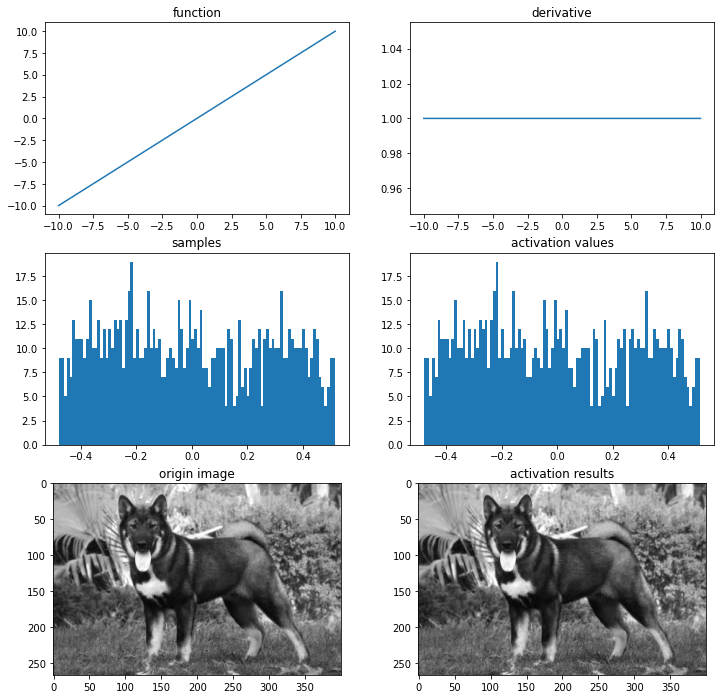

In [76]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

- 선형 활성화 함수를 사용한 모델은 그 이름에 걸맞게 선형적으로 구분 가능한 문제를 해결할 수 있다.

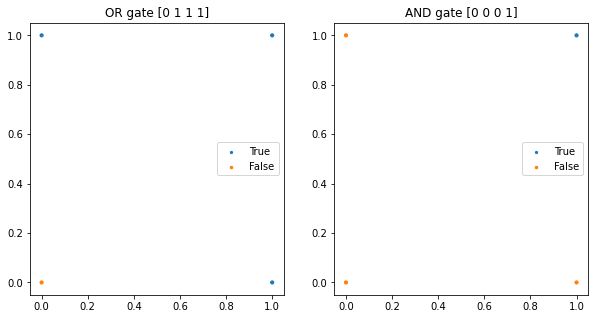

In [77]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [78]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [79]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


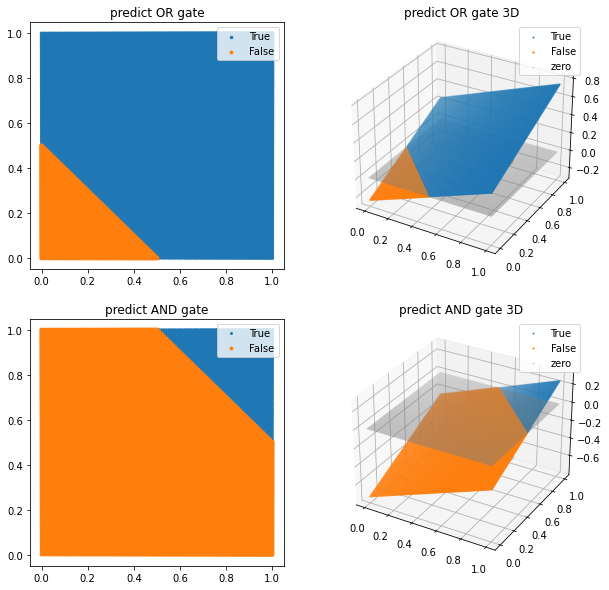

In [80]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

물론 선형 활성화를 사용한 단층 퍼셉트론이 정확한 값을 예측하는 것은 아닙니다. 위의 예시를 보면 첫 번째 `AND gate`를 구현하기 위한 모델에 `[[0,0],[0,1],[1,0],[1,1]]`을 넣으면 나오는 출력값은 `[[-0.25],[0.25],[0.25],[0.75]]`이며, 두 번째 `OR gate`를 구현하기 위한 모델에 `[[0,0],[0,1],[1,0],[1,1]]`를 넣으면 출력값은 `[[0.25],[0.75],[0.75],[1.25]]`가 됩니다. 따라서 그림에도 결과가 유사하다는 표현을 해놓았습니다. 하지만, 만약 **0.5**를 기준으로 기준보다 높으면 **1**이고 낮으면 **0**을 출력하게 한다면, 이 모델들은 `AND gate`와 `OR gate`를 완벽히 구현한다고 말할 수 있습니다.


그럼 이 모델로 XOR gate를 구현할 수 있을까요? 정답은 '불가능하다' 입니다.


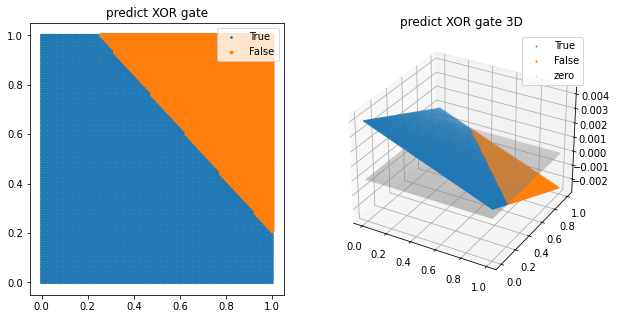

In [81]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

#### test : linear 한 층 더 쌓으면 XOR 판별 가능한지

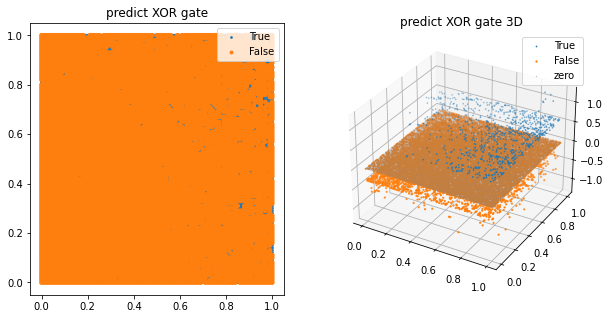

In [83]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(10, activation='linear'), # 해당 층 추가
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

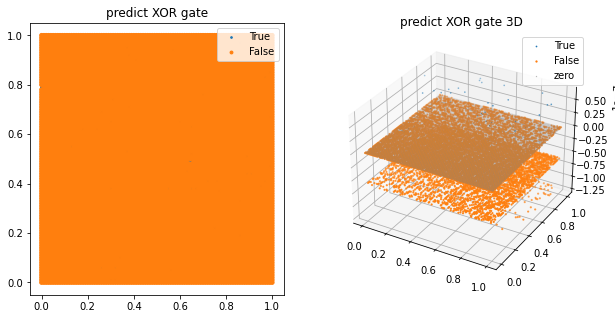

In [86]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(5, activation='linear'), # 해당 층 추가
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

## 활성화 함수의 종류 (3) 비선형 활성화 함수-시그모이드, Softmax

- 미분 가능(역전파 알고리즘 사용 가능)
- 다중 출력 가능
- 비선형적 데이터 표현 가능

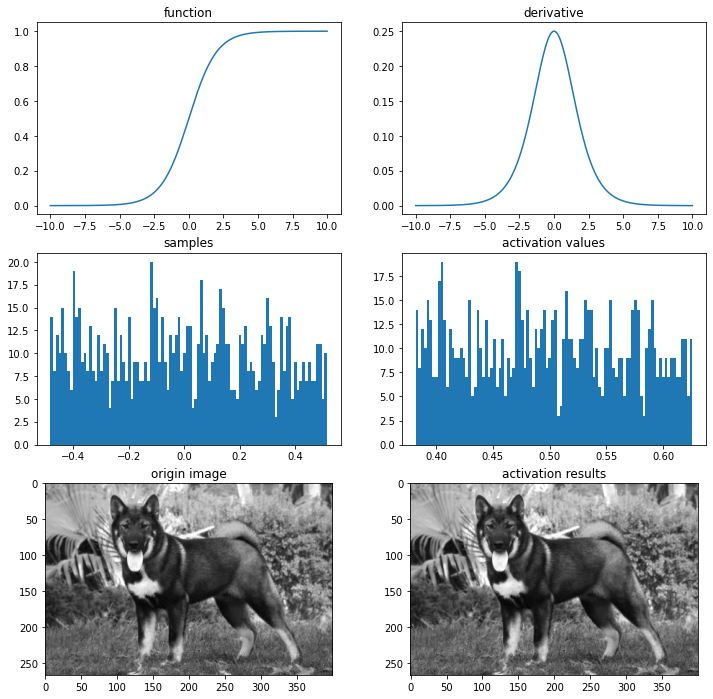

In [87]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

### 수치 미분과 해석 미분의 차이


- 수치 미분이라고 하면 $h$의 값을 최대한 $0$에 가까운 값으로 잡아서 실제 미분값에 근사하게 만들어주는 것이라고 할 수 있다.
- (아주 작은 $h$를 주려고 $h=1e-20$이라고 선언한다면, 컴퓨터가 이를 그냥 0으로 인식해 $x+h = x$라는 결과를 출력해버립니다.)

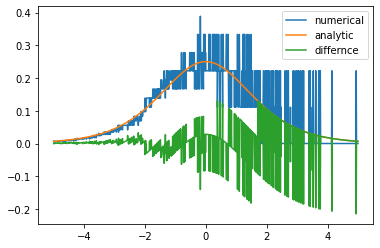

In [103]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

#### 비선형 활성화 함수 시그모이드를 사용해 AND gate, OR gate, XOR gate 구현

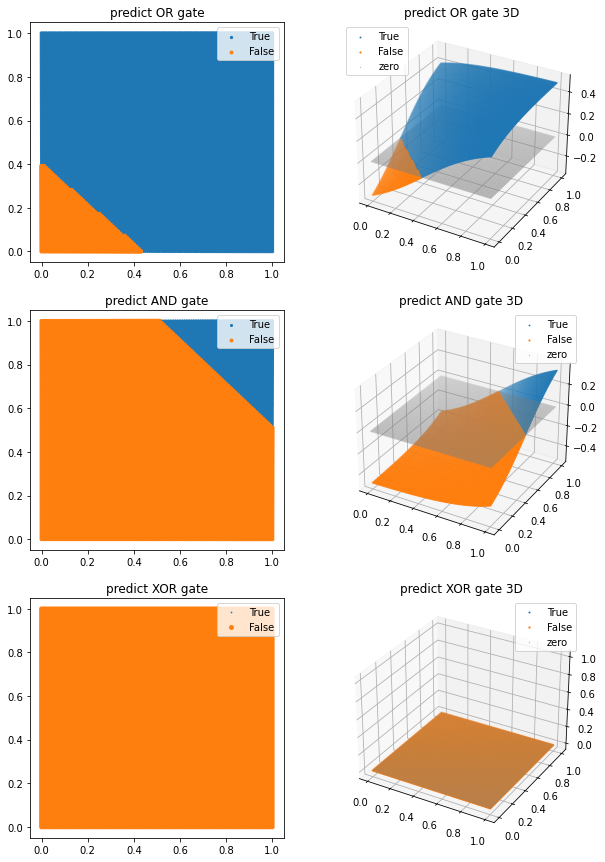

In [105]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

- XOR은 제대로 하지 못하는 것을 볼 수 있다.
- 그러나 단층 퍼셉트로도 가능한 방법이 있고,
- 혹은 아래와 같이 레이어를 추가하면 가능하다.

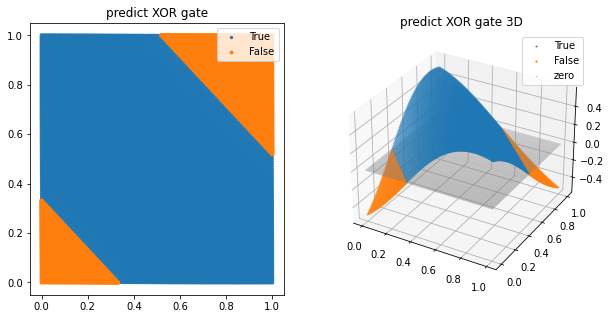

In [106]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

## 활성화 함수의 종류 (4) 비선형 활성화 함수-하이퍼볼릭 탄젠트

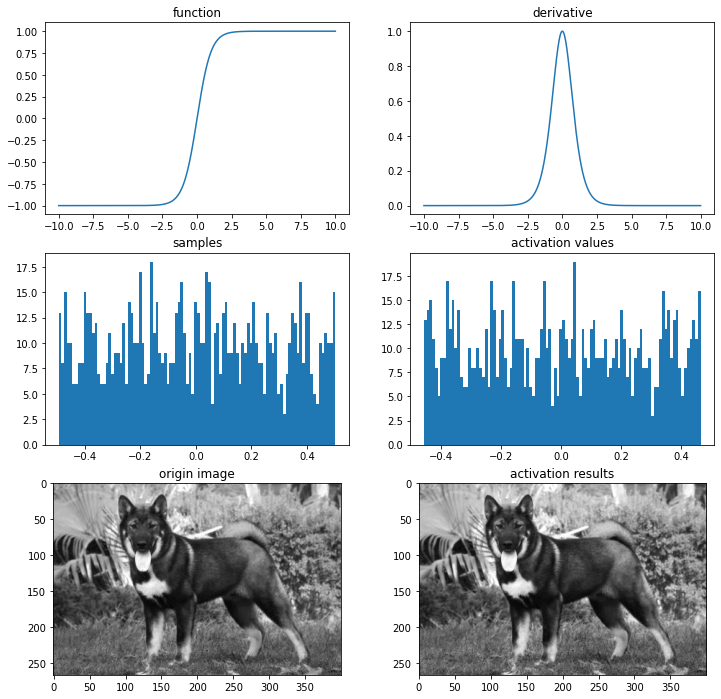

In [107]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

## 활성화 함수의 종류 (5) 비선형 활성화 함수-ReLU

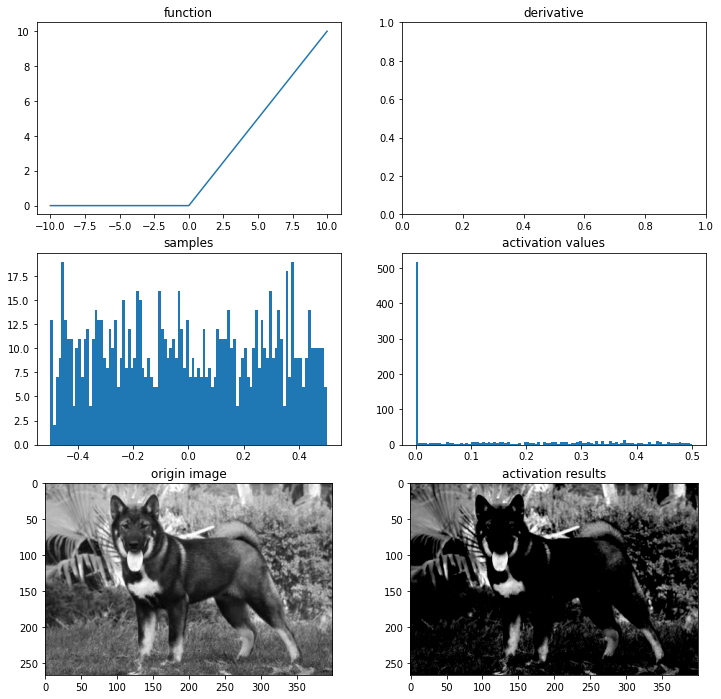

In [108]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

### ReLU 함수를 이용한 모델은 비선형적 데이터의 특징을 잘 잡아낼까?

- 곡선 형태도 아닌데 어떻게 할까 싶지만 가능하다.
- 수학적 증명을 한 논문 주소(https://arxiv.org/abs/1807.03973)

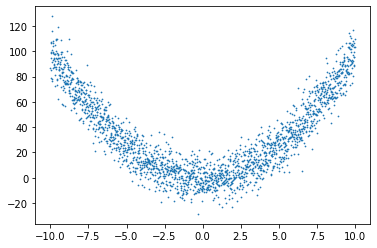

In [109]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [111]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 6)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 6         
__________________________________

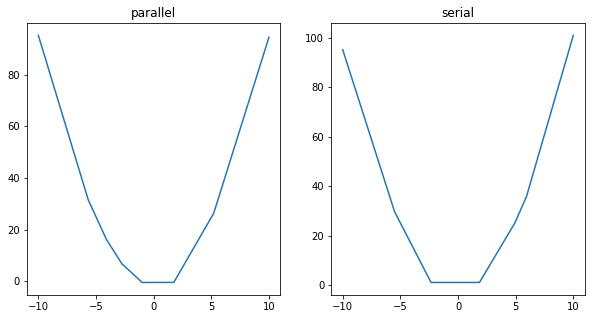

In [113]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

- 그래프를 보면 $y=xˆ2$ 같은 그래프도 표현 가능하다.
- 그리고 병렬이 더 효과적이다.

---------------
---------------
---------------
---------------

In [119]:
q_X.shape

(2001,)

In [118]:
q_test_X.shape

(2001, 1)

In [121]:
tt = (*q_X.shape, 1)

In [122]:
tt

(2001, 1)

---------------
---------------
---------------
---------------

## 활성화 함수의 종류 (6) 비선형 활성화 함수-ReLU의 단점을 극복하기 위한 시도들


### Leaky ReLU
- dying ReLU를 해결하기 위함

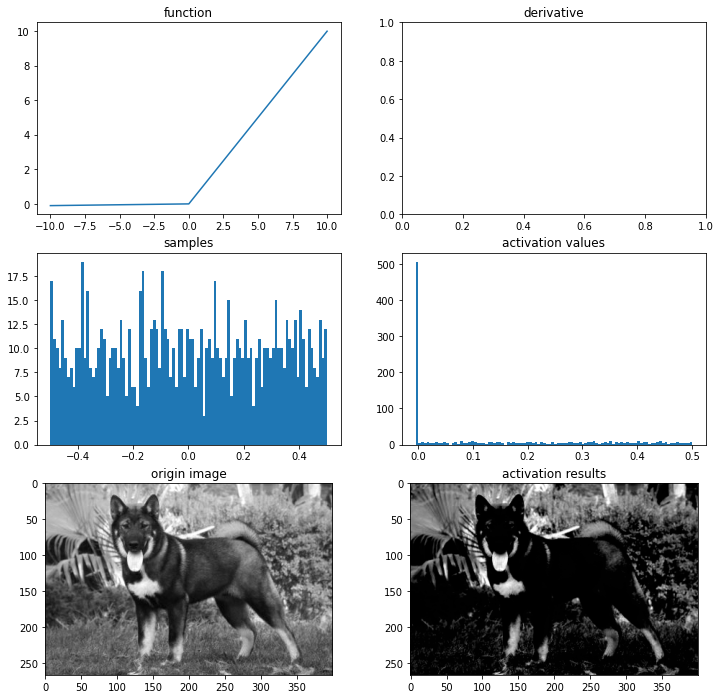

In [123]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

- 자세히 보면 위에 activation value에 음수 부분에 값들이 있는 것을 볼 수 있다.

### PReLU

- PReLU(parametric ReLU) 는 Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했다.

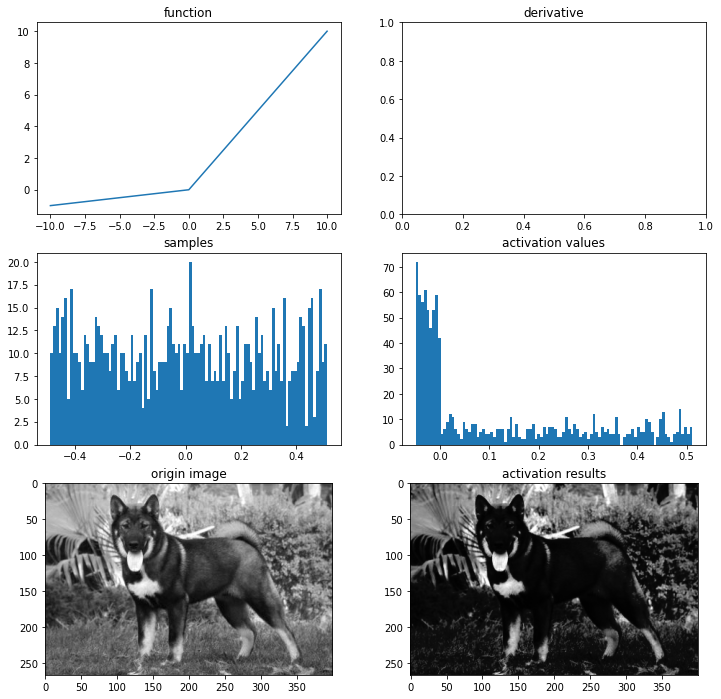

In [124]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU

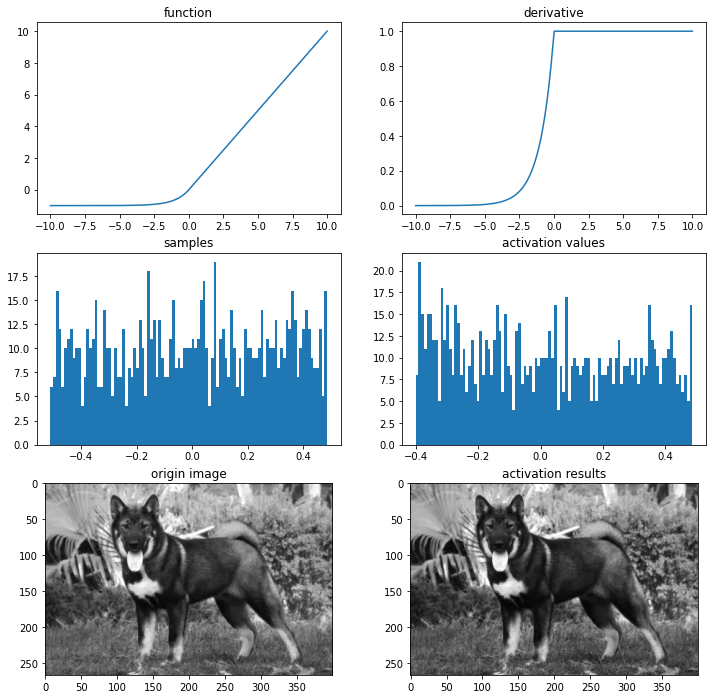

In [131]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()